# Building a Classifier Using Decision Tree to predict the COVID-19 Severity. Print outthe Accuracy, classification error, sensitivity, specificity, precision, and ConfusionMatrix of Classification.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Cleaned-Data.csv')

In [3]:
data

Fever  Tiredness  Dry-Cough  Difficulty-in-Breathing  Sore-Throat  \
0           1          1          1                        1            1   
1           1          1          1                        1            1   
2           1          1          1                        1            1   
3           1          1          1                        1            1   
4           1          1          1                        1            1   
...       ...        ...        ...                      ...          ...   
316795      0          0          0                        0            0   
316796      0          0          0                        0            0   
316797      0          0          0                        0            0   
316798      0          0          0                        0            0   
316799      0          0          0                        0            0   

        None_Sympton  Pains  Nasal-Congestion  Runny-Nose  Diarrhea  ...  \
0                  0      1                 1           1         1  ...   
1                  0      1                 1           1         1  ...   
2                  0      1                 1           1         1  ...   
3                  0      1                 1           1         1  ...   
4                  0      1                 1           1         1  ...   
...              ...    ...               ...         ...       ...  ...   
316795             1      0                 0           0         0  ...   
316796             1      0                 0           0         0  ...   
316797             1      0                 0           0         0  ...   
316798             1      0                 0           0         0  ...   
316799             1      0                 0           0         0  ...   

        Gender_Male  Gender_Transgender  Severity_Mild  Severity_Moderate  \
0                 1                   0              1                  0   
1                 1                   0              1                  0   
2                 1                   0              1                  0   
3                 1                   0              0                  1   
4                 1                   0              0                  1   
...             ...                 ...            ...                ...   
316795            0                   1              0                  0   
316796            0                   1              0                  0   
316797            0                   1              0                  0   
316798            0                   1              0                  0   
316799            0                   1              0                  0   

        Severity_None  Severity_Severe  Contact_Dont-Know  Contact_No  \
0                   0                0                  0           0   
1                   0                0                  0           1   
2                   0                0                  1           0   
3                   0                0                  0           0   
4                   0                0                  0           1   
...               ...              ...                ...         ...   
316795              0                1                  0           1   
316796              0                1                  1           0   
316797              1                0                  0           0   
316798              1                0                  0           1   
316799              1                0                  1           0   

        Contact_Yes  Country  
0                 1    China  
1                 0    China  
2                 0    China  
3                 1    China  
4                 0    China  
...             ...      ...  
316795            0    Other  
316796            0    Other  
316797            1    Other  
316798            0    Other  
316799            0    Othe

In [4]:
data.isnull().sum()

Fever                      0
Tiredness                  0
Dry-Cough                  0
Difficulty-in-Breathing    0
Sore-Throat                0
None_Sympton               0
Pains                      0
Nasal-Congestion           0
Runny-Nose                 0
Diarrhea                   0
None_Experiencing          0
Age_0-9                    0
Age_10-19                  0
Age_20-24                  0
Age_25-59                  0
Age_60+                    0
Gender_Female              0
Gender_Male                0
Gender_Transgender         0
Severity_Mild              0
Severity_Moderate          0
Severity_None              0
Severity_Severe            0
Contact_Dont-Know          0
Contact_No                 0
Contact_Yes                0
Country                    0
dtype: int64

In [5]:
data.drop_duplicates(inplace=True)

In [6]:
data

Fever  Tiredness  Dry-Cough  Difficulty-in-Breathing  Sore-Throat  \
0           1          1          1                        1            1   
1           1          1          1                        1            1   
2           1          1          1                        1            1   
3           1          1          1                        1            1   
4           1          1          1                        1            1   
...       ...        ...        ...                      ...          ...   
316795      0          0          0                        0            0   
316796      0          0          0                        0            0   
316797      0          0          0                        0            0   
316798      0          0          0                        0            0   
316799      0          0          0                        0            0   

        None_Sympton  Pains  Nasal-Congestion  Runny-Nose  Diarrhea  ...  \
0                  0      1                 1           1         1  ...   
1                  0      1                 1           1         1  ...   
2                  0      1                 1           1         1  ...   
3                  0      1                 1           1         1  ...   
4                  0      1                 1           1         1  ...   
...              ...    ...               ...         ...       ...  ...   
316795             1      0                 0           0         0  ...   
316796             1      0                 0           0         0  ...   
316797             1      0                 0           0         0  ...   
316798             1      0                 0           0         0  ...   
316799             1      0                 0           0         0  ...   

        Gender_Male  Gender_Transgender  Severity_Mild  Severity_Moderate  \
0                 1                   0              1                  0   
1                 1                   0              1                  0   
2                 1                   0              1                  0   
3                 1                   0              0                  1   
4                 1                   0              0                  1   
...             ...                 ...            ...                ...   
316795            0                   1              0                  0   
316796            0                   1              0                  0   
316797            0                   1              0                  0   
316798            0                   1              0                  0   
316799            0                   1              0                  0   

        Severity_None  Severity_Severe  Contact_Dont-Know  Contact_No  \
0                   0                0                  0           0   
1                   0                0                  0           1   
2                   0                0                  1           0   
3                   0                0                  0           0   
4                   0                0                  0           1   
...               ...              ...                ...         ...   
316795              0                1                  0           1   
316796              0                1                  1           0   
316797              1                0                  0           0   
316798              1                0                  0           1   
316799              1                0                  1           0   

        Contact_Yes  Country  
0                 1    China  
1                 0    China  
2                 0    China  
3                 1    China  
4                 0    China  
...             ...      ...  
316795            0    Other  
316796            0    Other  
316797            1    Other  
316798            0    Other  
316799            0    Othe

In [7]:
data.columns

Index(['Fever', 'Tiredness', 'Dry-Cough', 'Difficulty-in-Breathing',
       'Sore-Throat', 'None_Sympton', 'Pains', 'Nasal-Congestion',
       'Runny-Nose', 'Diarrhea', 'None_Experiencing', 'Age_0-9', 'Age_10-19',
       'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Female', 'Gender_Male',
       'Gender_Transgender', 'Severity_Mild', 'Severity_Moderate',
       'Severity_None', 'Severity_Severe', 'Contact_Dont-Know', 'Contact_No',
       'Contact_Yes', 'Country'],
      dtype='object')

In [8]:
Newdata =data.drop(['Severity_Mild', 'Severity_Moderate', 'Severity_None' ,'Severity_Severe','Country'], axis=1)

In [9]:
Newdata

Fever  Tiredness  Dry-Cough  Difficulty-in-Breathing  Sore-Throat  \
0           1          1          1                        1            1   
1           1          1          1                        1            1   
2           1          1          1                        1            1   
3           1          1          1                        1            1   
4           1          1          1                        1            1   
...       ...        ...        ...                      ...          ...   
316795      0          0          0                        0            0   
316796      0          0          0                        0            0   
316797      0          0          0                        0            0   
316798      0          0          0                        0            0   
316799      0          0          0                        0            0   

        None_Sympton  Pains  Nasal-Congestion  Runny-Nose  Diarrhea  ...  \
0                  0      1                 1           1         1  ...   
1                  0      1                 1           1         1  ...   
2                  0      1                 1           1         1  ...   
3                  0      1                 1           1         1  ...   
4                  0      1                 1           1         1  ...   
...              ...    ...               ...         ...       ...  ...   
316795             1      0                 0           0         0  ...   
316796             1      0                 0           0         0  ...   
316797             1      0                 0           0         0  ...   
316798             1      0                 0           0         0  ...   
316799             1      0                 0           0         0  ...   

        Age_10-19  Age_20-24  Age_25-59  Age_60+  Gender_Female  Gender_Male  \
0               0          0          0        0              0            1   
1               0          0          0        0              0            1   
2               0          0          0        0              0            1   
3               0          0          0        0              0            1   
4               0          0          0        0              0            1   
...           ...        ...        ...      ...            ...          ...   
316795          0          0          0        1              0            0   
316796          0          0          0        1              0            0   
316797          0          0          0        1              0            0   
316798          0          0          0        1              0            0   
316799          0          0          0        1              0            0   

        Gender_Transgender  Contact_Dont-Know  Contact_No  Contact_Yes  
0                        0                  0           0            1  
1                        0                  0           1            0  
2                        0                  1           0            0  
3                        0                  0           0            1  
4                        0                  0           1            0  
...                    ...                ...         ...          ...  
316795                   1                  0           1            0  
316796                   1                  1           0            0  
316797                   1                  0           0            1  
316798                   1                  0           1            0  
316799                   1                  1           0            0  

[316800 rows x 22 columns]

In [10]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
train_df_scaled=scaler.fit_transform(Newdata)

In [11]:
indicators =[]
indicators2 =[]
target_columns=[]
severity= []

indicators = ['Fever', 'Tiredness', 'Dry-Cough',  'Difficulty-in-Breathing', 'Sore-Throat', 'Pains', 'Nasal-Congestion',
              'Runny-Nose', 'Diarrhea', 'Age_0-9', 'Age_10-19', 'Age_20-24', 'Age_25-59', 'Age_60+', 'Gender_Male',
              'Gender_Female', 'Gender_Transgender']
target_columns = ['Severity_None']

features = data[indicators]
targets = data[target_columns]


In [12]:
display(features.head(), targets.head())

Fever  Tiredness  Dry-Cough  Difficulty-in-Breathing  Sore-Throat  Pains  \
0      1          1          1                        1            1      1   
1      1          1          1                        1            1      1   
2      1          1          1                        1            1      1   
3      1          1          1                        1            1      1   
4      1          1          1                        1            1      1   

   Nasal-Congestion  Runny-Nose  Diarrhea  Age_0-9  Age_10-19  Age_20-24  \
0                 1           1         1        1          0          0   
1                 1           1         1        1          0          0   
2                 1           1         1        1          0          0   
3                 1           1         1        1          0          0   
4                 1           1         1        1          0          0   

   Age_25-59  Age_60+  Gender_Male  Gender_Female  Gender_Transgender  
0          0        0            1              0                   0  
1          0        0            1              0                   0  
2          0        0            1              0                   0  
3          0        0            1              0                   0  
4          0        0            1              0                   0

Severity_None
0              0
1              0
2              0
3              0
4              0

<AxesSubplot:xlabel='Occurence_Count', ylabel='Indicator'>

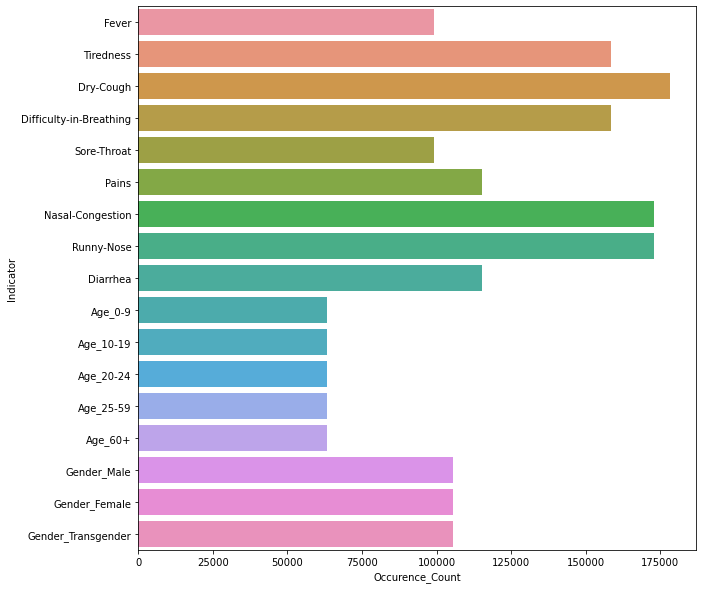

In [13]:
plt.figure(figsize = (10 ,10))
temp = []
for i in indicators:
    temp.append(sum(features[i].values))
temp_df = pd.DataFrame({"Indicator":indicators, "Occurence_Count":temp})
sns.barplot(data = temp_df, y="Indicator", x="Occurence_Count")

In [14]:
targets = targets['Severity_None']

In [15]:
target = np.array(targets)

In [16]:
target

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [17]:
np.unique(target)

array([0, 1], dtype=int64)

In [18]:
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier()

In [19]:
# fitting the model
model = decisiontree.fit(features,target)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,target,test_size=0.2,random_state=1)

In [21]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [22]:
y_pred = decisiontree.predict(X_test)

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy Score is: ", accuracy_score(y_test,y_pred))

Accuracy Score is:  0.749084595959596


In [24]:
print("Error rate is: ", 1-(accuracy_score(y_test,y_pred)))

Error rate is:  0.250915404040404


In [25]:
print("Precision Score: ", precision_score(y_test,y_pred))

Precision Score:  0.0


In [26]:
print("Recall Score: ",recall_score(y_test, y_pred))

Recall Score:  0.0


In [27]:
from sklearn.metrics import confusion_matrix as cm
c = cm(y_test,y_pred)

In [28]:
c

array([[47462,     0],
       [15898,     0]], dtype=int64)

In [29]:
sensitivity1 = c[0,0]/(c[0,0]+c[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = c[1,1]/(c[1,0]+c[1,1])
print('Specificity : ', specificity1)

Sensitivity :  1.0
Specificity :  0.0


In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86     47462
           1       0.00      0.00      0.00     15898

    accuracy                           0.75     63360
   macro avg       0.37      0.50      0.43     63360
weighted avg       0.56      0.75      0.64     63360



In [33]:
# Dot Data for the Predictions
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(decisiontree, out_file = None,feature_names=indicators,class_names=str(np.unique(target)))
graph = graphviz.Source(dot_data, format="png") 
graph

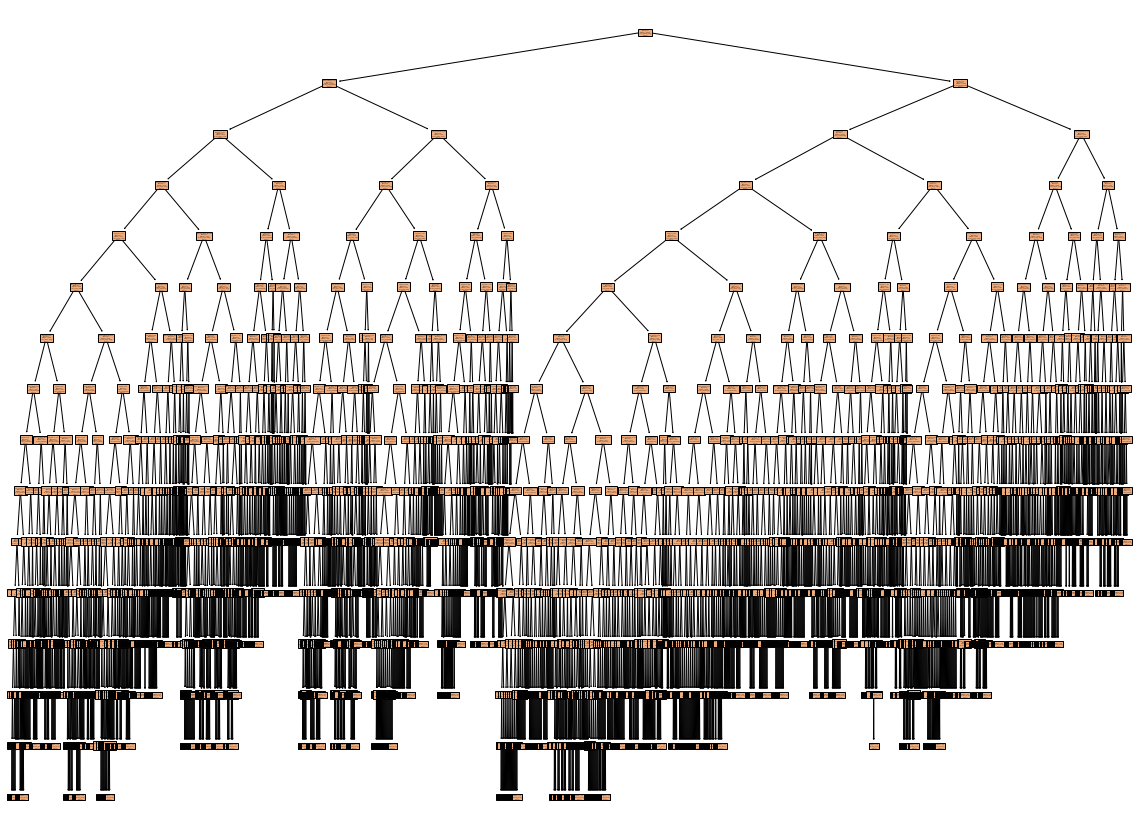

In [67]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20, 15))
plot_tree(decisiontree, feature_names=indicators,class_names=str(np.unique(target)), filled=True)
plt.show()